In [91]:
using Sunny
using LinearAlgebra
using GLMakie, Plots

In [92]:
############## load cif file ##############
cif_file = joinpath(@__DIR__, "BNZS_SSL.cif")
cryst = Crystal(cif_file, symprec=1e-3)
Nd_subcryst = subcrystal(cryst, "Nd1");
# view_crystal(Nd_subcryst, 7.0)

Crystal
HM symbol 'P 4/m c c' (124)
Lattice params a=15.68, b=15.68, c=13.61, α=90°, β=90°, γ=90°
Cell volume 3346
Type 'Nd1', Wyckoff 8m (point group 'm..'):
   1. [0.1708, 0.0792, 0]
   2. [0.6709, 0.0792, 0]
   3. [0.4208, 0.1708, 0]
   4. [0.9208, 0.1708, 0]
   5. [0.0792, 0.3292, 0]
   6. [0.5792, 0.3292, 0]
   7. [0.3292, 0.4208, 0]
   8. [0.8292, 0.4208, 0]
   9. [0.1708, 0.5792, 0]
   10. [0.6709, 0.5792, 0]
   11. [0.4208, 0.6709, 0]
   12. [0.9208, 0.6709, 0]
   13. [0.0792, 0.8292, 0]
   14. [0.5792, 0.8292, 0]
   15. [0.3292, 0.9208, 0]
   16. [0.8292, 0.9208, 0]
   17. [0.3292, 0.0792, 0.5]
   18. [0.8292, 0.0792, 0.5]
   19. [0.0792, 0.1708, 0.5]
   20. [0.5792, 0.1708, 0.5]
   21. [0.4208, 0.3292, 0.5]
   22. [0.9208, 0.3292, 0.5]
   23. [0.1708, 0.4208, 0.5]
   24. [0.6709, 0.4208, 0.5]
   25. [0.3292, 0.5792, 0.5]
   26. [0.8292, 0.5792, 0.5]
   27. [0.0792, 0.6709, 0.5]
   28. [0.5792, 0.6709, 0.5]
   29. [0.4208, 0.8292, 0.5]
   30. [0.9208, 0.8292, 0.5]
   31. [0.17

In [93]:
############## symmetry analysis ##############
print_symmetry_table(Nd_subcryst, 5.0)
L=1
k=1
dim = (L, L, k)
gt=2.5
gtensor=[gt gt 0; gt gt 0; 0 0 0]
sys = System(Nd_subcryst, dim, [SpinInfo(1, S=1/2, g=gtensor)], :SUN, units=Units.meV)

Atom 1
Type 'Nd1', position [0.1708, 0.0792, 0], multiplicity 32
Allowed g-tensor: |   A  D+E    0 |
                  | D-E    B    0 |
                  |   0    0    C |
Allowed anisotropy in Stevens operators 𝒪[k,q]:
    c₁*𝒪[2,-2] + c₂*𝒪[2,0] + c₃*𝒪[2,2] +
    c₄*𝒪[4,-4] + c₅*𝒪[4,-2] + c₆*𝒪[4,0] + c₇*𝒪[4,2] + c₈*𝒪[4,4] +
    c₉*𝒪[6,-6] + c₁₀*𝒪[6,-4] + c₁₁*𝒪[6,-2] + c₁₂*𝒪[6,0] + c₁₃*𝒪[6,2] + c₁₄*𝒪[6,4] + c₁₅*𝒪[6,6]

Bond(3, 6, [0, 0, 0])
Distance 3.5100130645547, coordination 1
Connects 'Nd1' at [0.4208, 0.1708, 0] to 'Nd1' at [0.5792, 0.3292, 0]
Allowed exchange matrix: | A  D  0 |
                         | D  B  0 |
                         | 0  0  C |

Bond(2, 3, [0, 0, 0])
Distance 4.1750642552536, coordination 2
Connects 'Nd1' at [0.6709, 0.0792, 0] to 'Nd1' at [0.4208, 0.1708, 0]
Allowed exchange matrix: |   A  D+E    0 |
                         | D-E    B    0 |
                         |   0    0    C |
Allowed DM vector: [0 0 E]

Bond(1, 3, [0, 0, 0])
Distance 4.17506425

System [SU(2)]
Cell size 32, Lattice size (1, 1, 1)


In [94]:
############## model set up ##############
# J₁ = -0.33
# set_exchange!(sys, [J₁  -J₁   0.0;
#                    -J₁   J₁   0.0;
#                     0.0  0.0  0.0], Bond(3, 6, [0, 0, 0]))
set_exchange!(sys, -0.9, Bond(3, 6, [0, 0, 0]))

J₂ = 0.285
set_exchange!(sys,[J₂   J₂ 0.0;
                   J₂   J₂ 0.0;
                   0.0  0.0 0.0], Bond(1, 7, [0, 0, 0]))

set_exchange!(sys,[J₂   J₂ 0.0;
                   J₂   J₂ 0.0;
                   0.0  0.0 0.0], Bond(7, 10, [0, 0, 0]))


B = 4.0
set_external_field!(sys, (B/sqrt(2), -B/sqrt(2), 0))

In [95]:
for i in range(start = 1, stop=L, step=1)
    for j in range(start = 1, stop=L, step=1)
        for k in range(start = 1, stop=k, step=1)
            polarize_spin!(sys,(1,-1,0),(i,j,k,4))
            polarize_spin!(sys,(1,-1,0),(i,j,k,11))
            polarize_spin!(sys,(1,-1,0),(i,j,k,14))
            polarize_spin!(sys,(1,-1,0),(i,j,k,5))
        
            polarize_spin!(sys,(-1,1,0),(i,j,k,3))#flip
            polarize_spin!(sys,(-1,1,0),(i,j,k,6))#flip
            polarize_spin!(sys,(-1,1,0),(i,j,k,12))#flip
            polarize_spin!(sys,(-1,1,0),(i,j,k,13))#flip
                            
            polarize_spin!(sys,(-1,-1,0),(i,j,k,1))
            polarize_spin!(sys,(1,1,0),(i,j,k,8))
            polarize_spin!(sys,(1,1,0),(i,j,k,10))
            polarize_spin!(sys,(-1,-1,0),(i,j,k,15))
                            
            polarize_spin!(sys,(1,1,0),(i,j,k,2))
            polarize_spin!(sys,(-1,-1,0),(i,j,k,7))
            polarize_spin!(sys,(-1,-1,0),(i,j,k,9))
            polarize_spin!(sys,(1,1,0),(i,j,k,16))
#Layer2
            polarize_spin!(sys,(1,-1,0),(i,j,k,18))
            polarize_spin!(sys,(1,-1,0),(i,j,k,23))
            polarize_spin!(sys,(1,-1,0),(i,j,k,25))
            polarize_spin!(sys,(1,-1,0),(i,j,k,32)) 
        
            polarize_spin!(sys,(-1,1,0),(i,j,k,17))#flip
            polarize_spin!(sys,(-1,1,0),(i,j,k,24))#flip
            polarize_spin!(sys,(-1,1,0),(i,j,k,26))#flip
            polarize_spin!(sys,(-1,1,0),(i,j,k,31))#flip
            
            polarize_spin!(sys,(1,1,0),(i,j,k,19))
            polarize_spin!(sys,(1,1,0),(i,j,k,22))
            polarize_spin!(sys,(1,1,0),(i,j,k,28))
            polarize_spin!(sys,(1,1,0),(i,j,k,29))
                            
            polarize_spin!(sys,(-1,-1,0),(i,j,k,20))
            polarize_spin!(sys,(-1,-1,0),(i,j,k,21))
            polarize_spin!(sys,(-1,-1,0),(i,j,k,27))
            polarize_spin!(sys,(-1,-1,0),(i,j,k,30))
        end
    end
end

    
for i in range(start = 1, stop=L, step=1)
    for j in range(start = 1, stop=L, step=1)
        for k in range(start = 1, stop=k, step=1)
            polarize_spin!(sys,(1,-1,0),(i,j,k,3))#flip
            polarize_spin!(sys,(1,-1,0),(i,j,k,6))#flip
            polarize_spin!(sys,(1,-1,0),(i,j,k,12))#flip
            polarize_spin!(sys,(1,-1,0),(i,j,k,13))#flip
#Layer2
            polarize_spin!(sys,(1,-1,0),(i,j,k,24))#flip
            polarize_spin!(sys,(1,-1,0),(i,j,k,26))#flip
            polarize_spin!(sys,(1,-1,0),(i,j,k,17))#flip
            polarize_spin!(sys,(1,-1,0),(i,j,k,31))#flip
            
        end
    end
end

plot_spins(sys,arrowlength=1, linewidth=0.5, arrowsize=1.0)

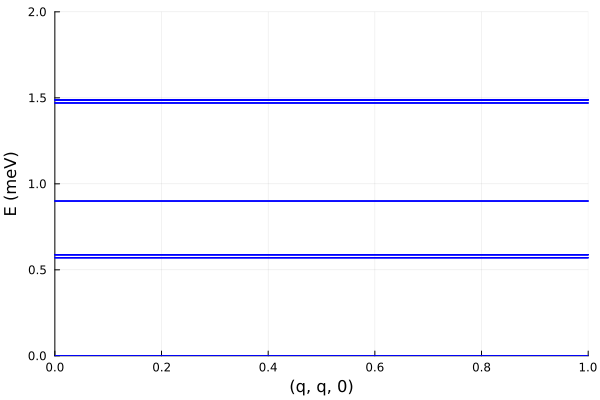

In [96]:
################ spin-wave calculations ##############
swt = SpinWaveTheory(sys)
qvals = 0.0:0.005:1.0
qs = [[q, q, 0] for q in qvals]
lenq = length(qs)
numband = length(sys.dipoles)
disp = dispersion(swt, qs)
energies = 0.0:0.01:2.0
INS_intensities = Sunny.intensities(swt, qs, energies, 0.05)
Plots.plot(qvals, disp, linecolor="blue", label="", xlims=(0, 1), ylims=(0, 2), xlabel="(q, q, 0)", ylabel="E (meV)")

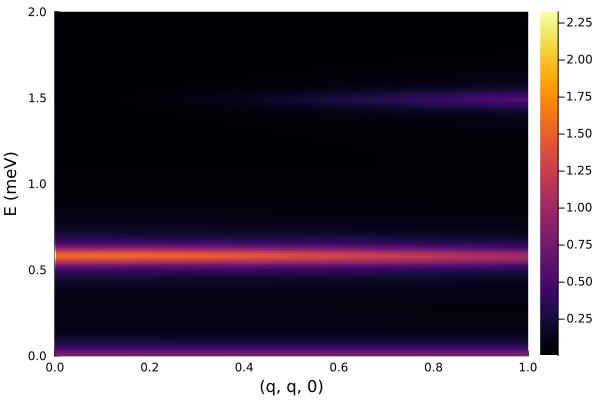

In [97]:
Plots.heatmap(qvals, energies, INS_intensities', xlims=(0, 1), ylims=(0, 2), xlabel="(q, q, 0)", ylabel="E (meV)")

In [98]:
energy(sys)

-11.721410889718076